In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/QbaSo/Desktop/sem2/TBD/projekt/project-team-tbd-7-2022Z/spark_ml/2B/phase2Data/ds2-1e4.csv")
df

,V1,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,label
0,303603,201360P014156,262470.0,366640,-4.059403,53.179025,60,2,1,1,...,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,2,Yes,W01000097,2013,False
1,407432,2014404CA0378,508615.0,221544,-0.423395,51.881844,40,3,2,1,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01015794,2014,True
2,170212,201001JI40028,543720.0,186070,0.071690,51.555160,1,3,1,1,...,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01003728,2010,True
3,107606,201231B171712,470948.0,381754,-0.936187,53.327943,31,3,2,1,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01028011,2012,True
4,373645,200663AC56406,228490.0,214010,-4.488724,51.798326,63,3,2,1,...,Daylight: Street light present,Fine without high winds,Wet/Damp,Roadworks,None,2,Yes,W01000672,2006,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,236581,200606C051999,382450.0,388980,-2.265407,53.397343,6,3,2,1,...,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01005085,2006,True
9996,45958,200506N034185,378120.0,416120,-2.332430,53.641126,6,3,2,1,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,E01005018,2005,True
9997,92084,2.00935E+12,531210.0,279700,-0.072871,52.399558,35,2,2,2,...,Daylight: Street light present,Unknown,Dry,None,None,2,Yes,E01018209,2009,False
9998,89875,2012160C00761,502290.0,432225,-0.449251,53.776315,16,3,2,2,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,E01012954,2012,True


In [14]:
X = df[['V1', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year']]
y = df['label']

In [15]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

ebm = ExplainableBoostingClassifier(random_state=seed)
ebm.fit(X_train, y_train)

ebm_global = ebm.explain_global()
show(ebm_global)

ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\interpret\glassbox\ebm\ebm.py:405: UserWarning:

Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]



<!-- http://127.0.0.1:7001/2634799133648/ -->

<!-- http://127.0.0.1:7001/2633018290912/ -->

In [16]:
preds = ebm.predict(X_test)

accuracy_score(preds, y_test)

0.847

(array([   2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1998.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

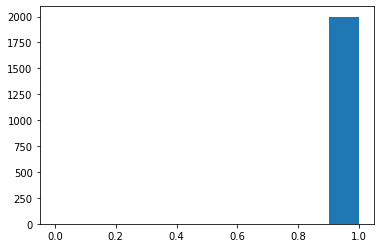

In [27]:
plt.hist(np.array(preds).astype(int))